# **Q5.**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor , plot_tree

In [5]:
data = { 'x1': [1,2,3,4,5,6,7,8], 'x2': [5,6,8,10,12,15,18,20], 'y':[10,12,15,18,21,25,28,30]}
df = pd.DataFrame(data)

X = df[['x1','x2']]
Y = df['y']

In [7]:
regression_tree = DecisionTreeRegressor(criterion='squared_error', max_depth = None, min_samples_split=2)
regression_tree.fit(X,Y)

DecisionTreeRegressor()

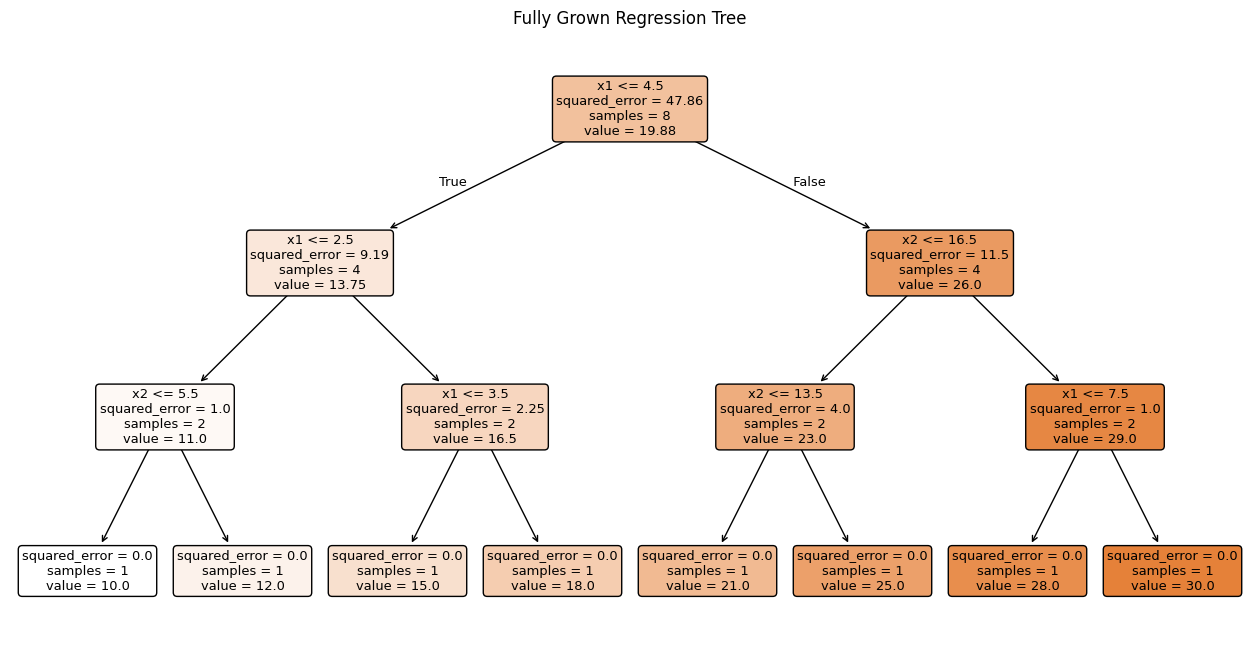

In [9]:
plt.figure(figsize=(16,8))
plot_tree(regression_tree, feature_names=['x1','x2'], filled = True, rounded = True, precision =2)
plt.title("Fully Grown Regression Tree")
plt.show()

# **Q6.**

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor , plot_tree ,  DecisionTreeClassifier

In [8]:
data = {
    'price': ['low', 'low', 'low', 'low', 'med', 'med', 'med', 'med', 'high', 'high', 'high'],
    'maintenance': ['low', 'med', 'low', 'high', 'med', 'med', 'high', 'high', 'med', 'high', 'high'],
    'capacity': [2, 4, 4, 4, 4, 4, 2, 5, 4, 2, 5],
    'airbag': ['no', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'yes', 'no', 'yes'],
    'profitable': ['yes', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'yes']
    }


df = pd.DataFrame(data)

df_encoded = pd.get_dummies(df.drop(columns=['profitable']))
y = df['profitable'].map({'no':0, 'yes': 1})

In [9]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=None, min_samples_split=2)
clf.fit(df_encoded, y)

DecisionTreeClassifier(criterion='entropy')

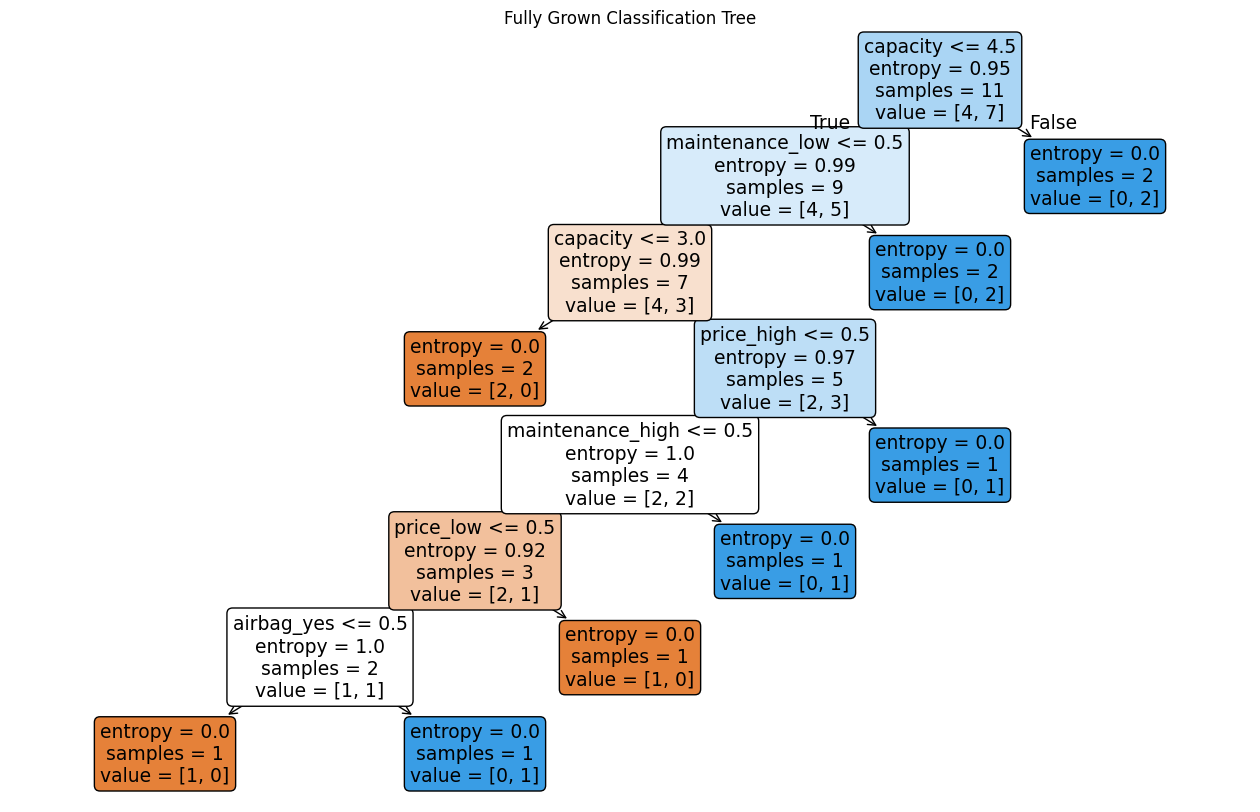

In [11]:
plt.figure(figsize=(16,10))
plot_tree(clf, feature_names=df_encoded.columns, filled=True, rounded=True, precision=2)
plt.title("Fully Grown Classification Tree")
plt.show()


# **Q7.**

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import mean_squared_error

In [28]:
train_data = pd.read_csv("/content/A4_train_74e601c5-f446-4f34-a53b-28ce05d1cec4.csv")
test_data = pd.read_csv("/content/A4_test_a4d66d34-6db0-44a4-a7c1-0aa26ab8d705.csv")


## a.  Train a fully grown binary classification tree & Visualize

In [30]:
X_train = train_data[['Feature1', 'Feature2']]
y_train = train_data['Label']

tree_clf = DecisionTreeClassifier(criterion='gini', random_state=0)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

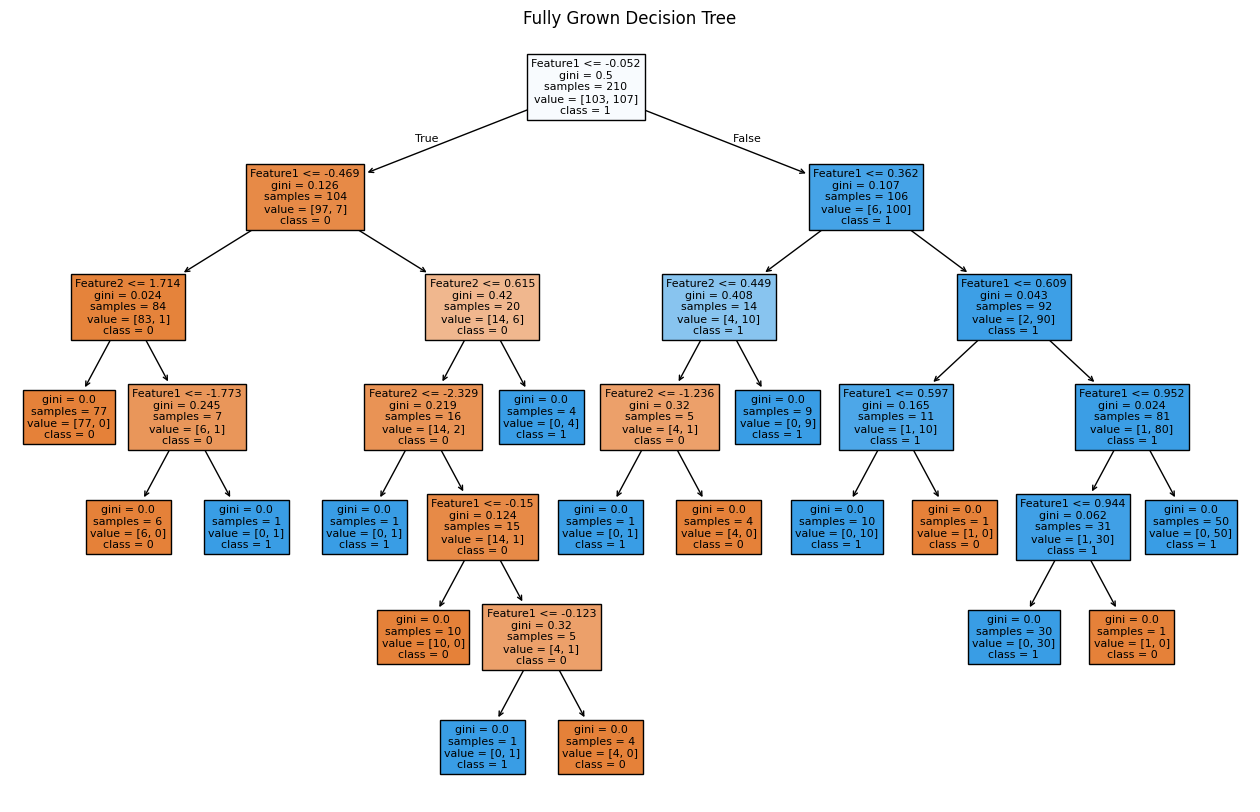

In [32]:
plt.figure(figsize=(16, 10))
plot_tree(tree_clf, feature_names=['Feature1', 'Feature2'], class_names=['0', '1'], filled=True)
plt.title('Fully Grown Decision Tree')
plt.show()

## b. Compute SSE on Test Set for each Depth & it's Plot

In [33]:
X_test = test_data[['Feature1', 'Feature2']]
y_test = test_data['Label']

sse_list = []
for depth in range(1, 21):
    tree_clf = DecisionTreeClassifier(max_depth=depth, criterion='gini', random_state=0)
    tree_clf.fit(X_train, y_train)
    y_pred = tree_clf.predict(X_test)
    sse = ((y_test - y_pred) ** 2).sum()
    sse_list.append({'depth': depth, 'sse': sse})

depths = [item['depth'] for item in sse_list]
sse_values = [item['sse'] for item in sse_list]

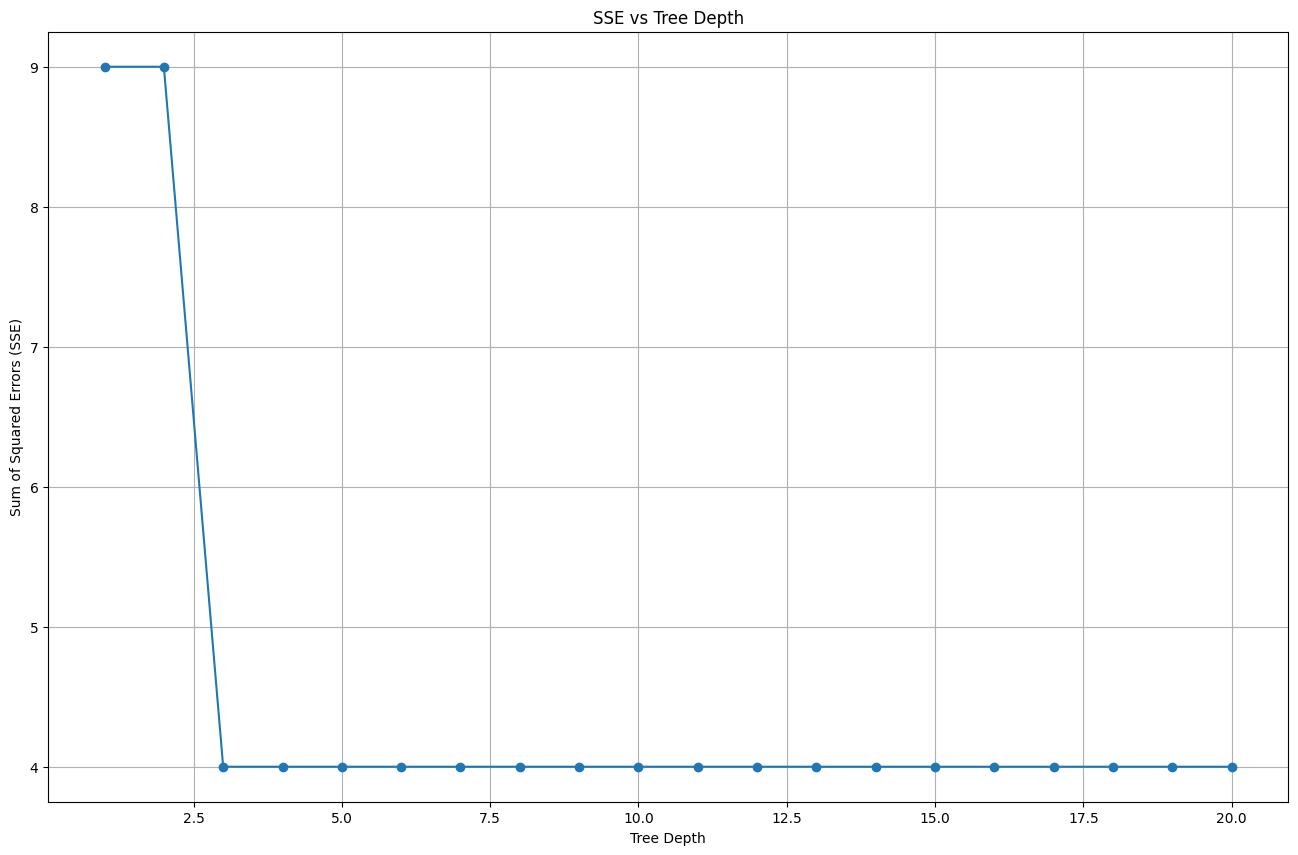

In [35]:
plt.figure(figsize=(16, 10))
plt.plot(depths, sse_values, marker='o')
plt.title('SSE vs Tree Depth')
plt.xlabel('Tree Depth')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.grid(True)
plt.show()

## c. Determine the optimal pruning depth by selecting the depth where the SSE change is minimal

In [37]:
sse_changes = [abs(sse_values[i] - sse_values[i-1]) for i in range(1, len(sse_values))]

min_change = min(sse_changes)
optimal_depth = sse_changes.index(min_change) + 2
print("Optimal pruning depth:", optimal_depth)
print("Minimal SSE change:", min_change)

Optimal pruning depth: 2
Minimal SSE change: 0.0


## d. Visualize the Pruned Tree

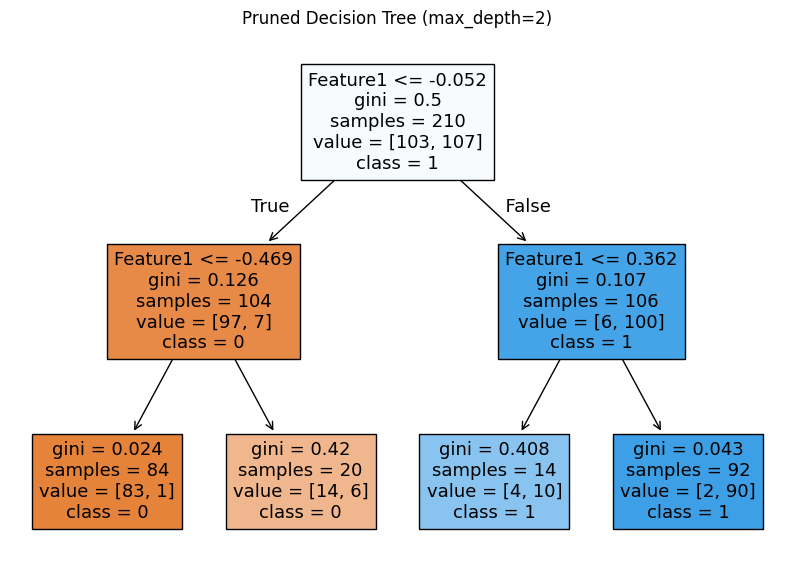

In [38]:
pruned_tree = DecisionTreeClassifier(max_depth=optimal_depth, criterion='gini', random_state=0)
pruned_tree.fit(X_train, y_train)

plt.figure(figsize=(10, 7))
plot_tree(pruned_tree, feature_names=['Feature1', 'Feature2'], class_names=['0', '1'], filled=True)
plt.title(f'Pruned Decision Tree (max_depth={optimal_depth})')
plt.show()